This dataset contains the unemployment rate of all the states in India

Region = states in India ,
Date = date which the unemployment rate observed ,
Frequency = measuring frequency (Monthly) ,
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India ,
Estimated Employed = percentage of people employed ,
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people  actively participating in the labour force by the
total number of people eligible to participate in the labor force

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, Therefore analyzing the unemployment rate in India using the dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural


In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#summary of quantitative column
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#datatypes of the columns in the dataframe
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

Trend Analysis


<ipython-input-26-57a9d94ed27a>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'])


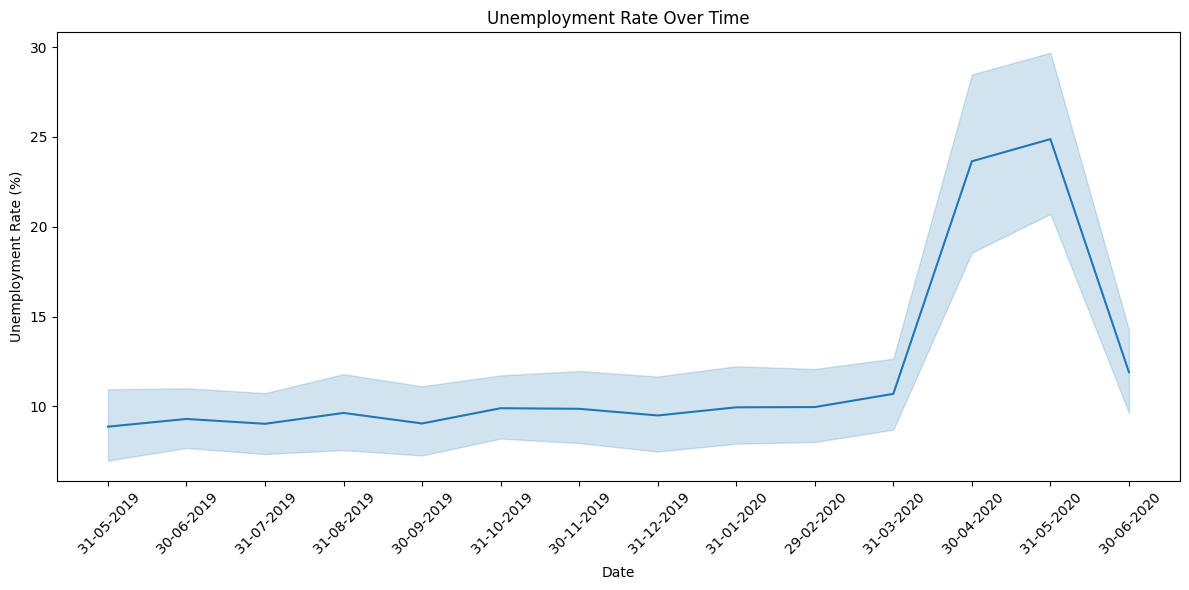

In [ ]:
# Plotting unemployment rates over time
df['Date'] = pd.to_datetime(df[' Date'])
# Setting 'Date' column as index
df.set_index(' Date', inplace=True)

# Plotting unemployment rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above chart shows that the unemployement increased during the month of march in 2020 and reached a peak in the next month itself this was the beginning of COVD -19 in India suggesting that the unemployment increased during the covid 19

Regional Disparities::

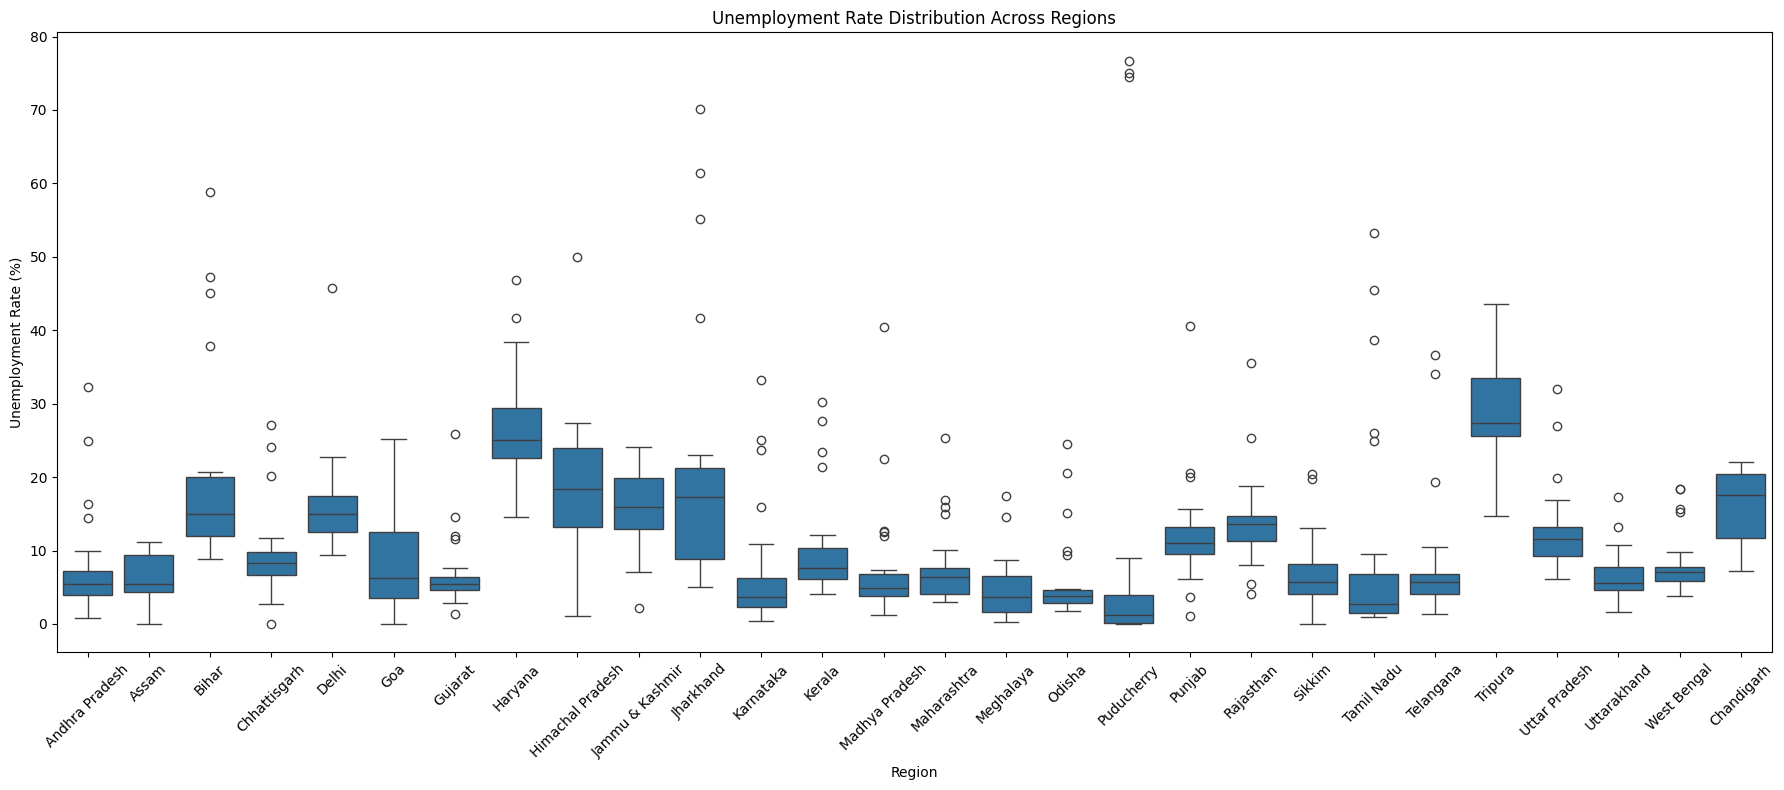

In [ ]:
#visualizing unemployment rates by 'Region'
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

on visualising the area of greater unemployment we can see that Thripra and Harayana had the highest unemployemntent rate during Covid 19


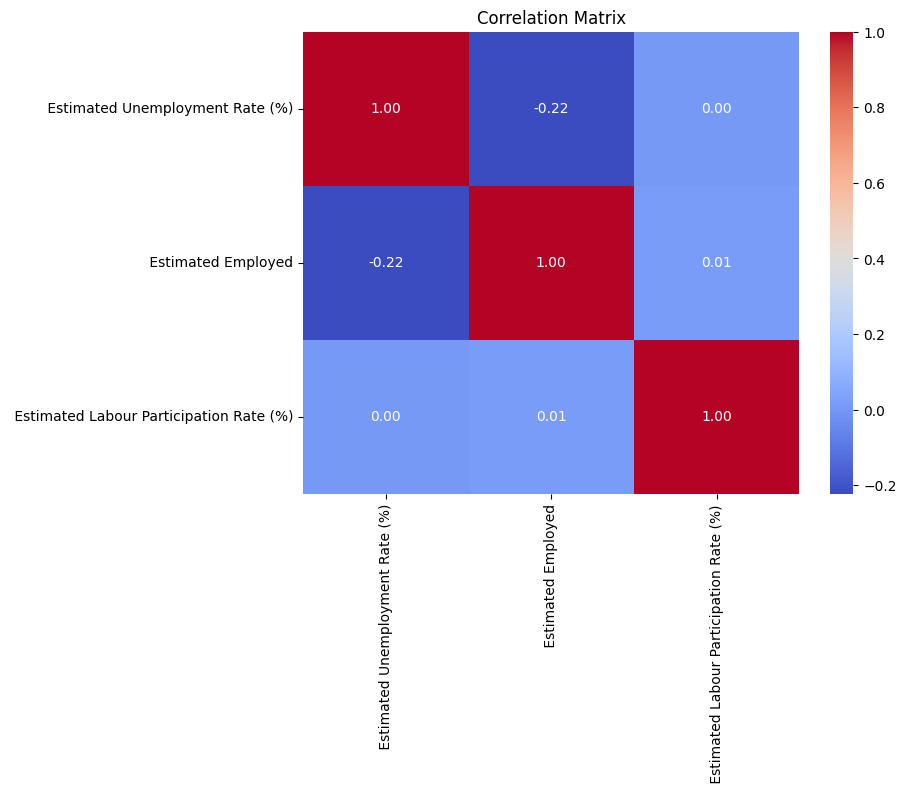

In [ ]:
correlation_matrix = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


From above we can say that the data shows negative correlation between the Estimated unemployment rate and Employement rate.

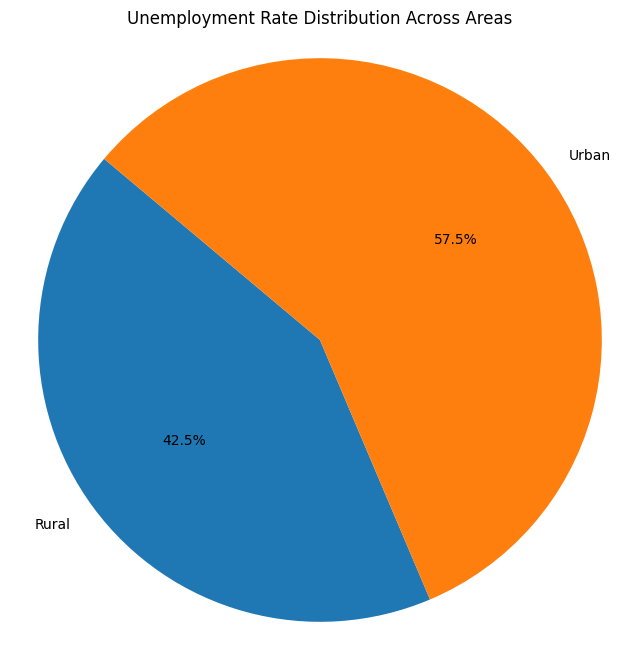

In [ ]:
# Calculate the total unemployment rate for each area
area_unemployment = df.groupby('Area')[' Estimated Unemployment Rate (%)'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_unemployment, labels=area_unemployment.index, autopct='%1.1f%%', startangle=140)
plt.title('Unemployment Rate Distribution Across Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From this we can say that the Urban areas were hit hardly in unemployement as compared to rural areas.

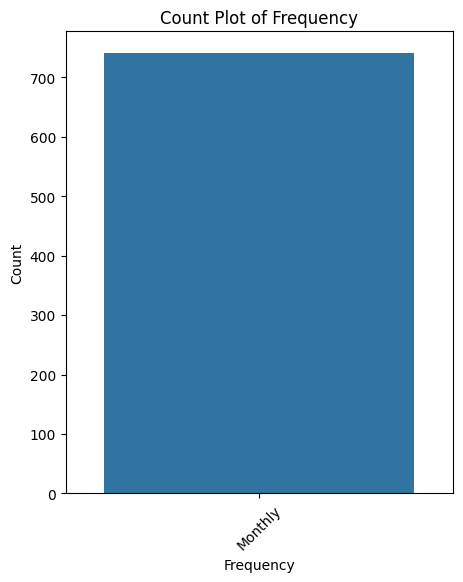

In [ ]:
df[' Frequency'] = df[' Frequency'].str.strip()
# Plotting the count plot
plt.figure(figsize=(5, 6))
sns.countplot(data=df, x=' Frequency')
plt.title('Count Plot of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

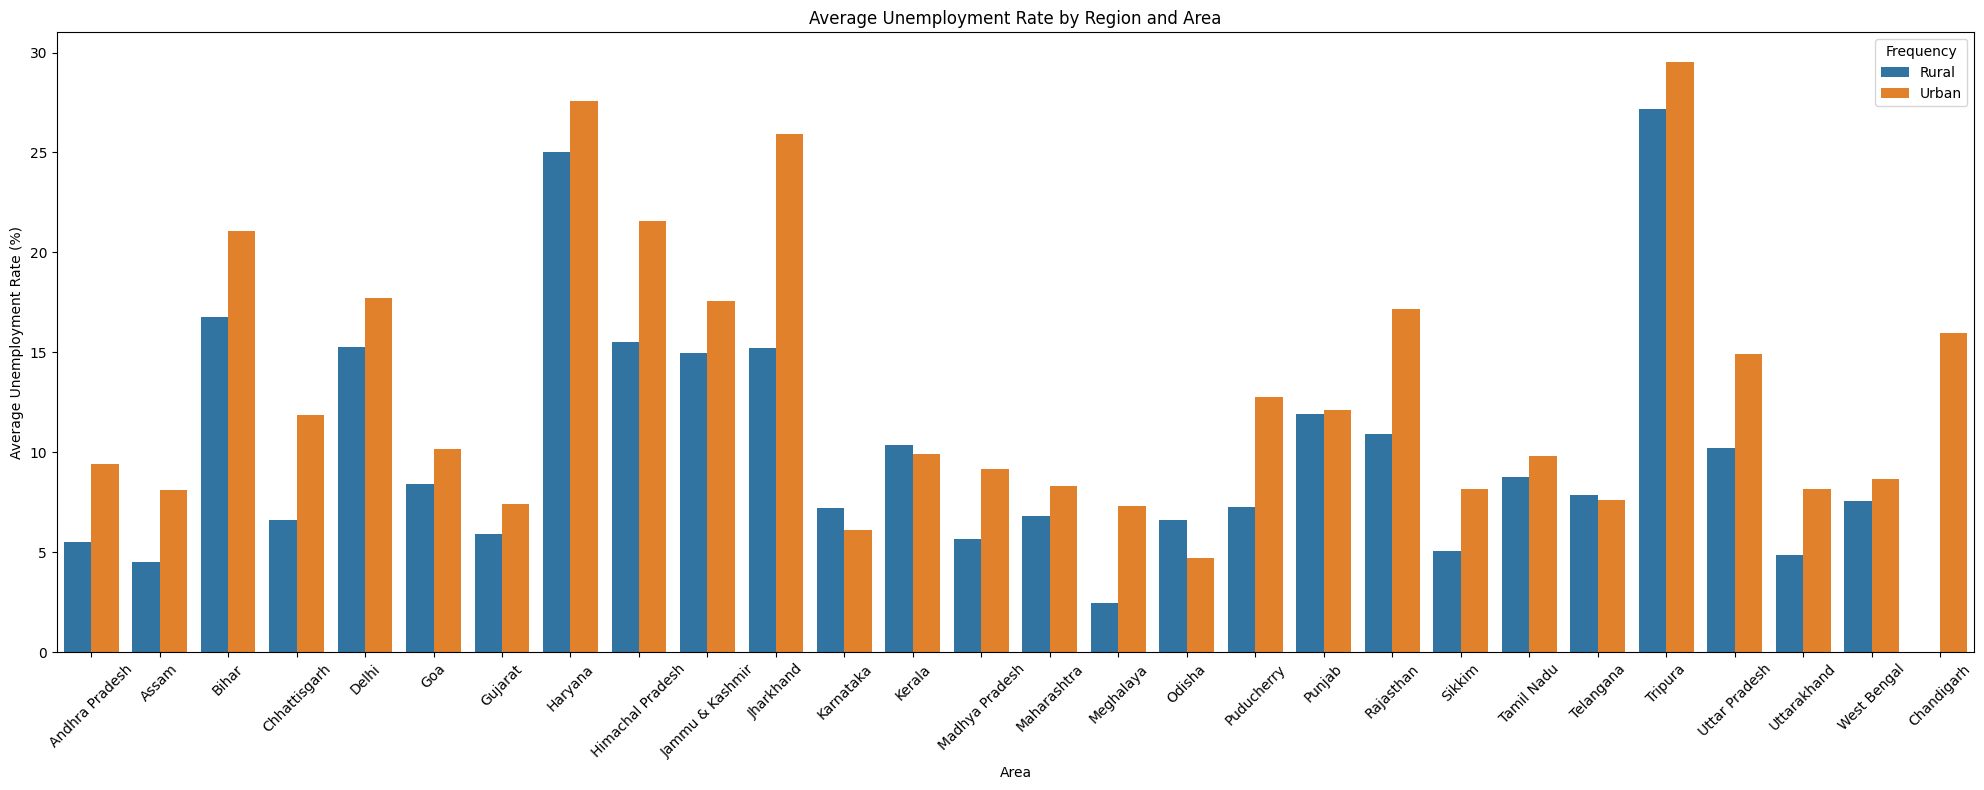

In [ ]:
grouped_data = df.groupby(['Area', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(20, 8))
sns.barplot(data=grouped_data, x='Region', y=' Estimated Unemployment Rate (%)', hue='Area')
plt.title('Average Unemployment Rate by Region and Area')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Frequency')
plt.tight_layout()
plt.show()

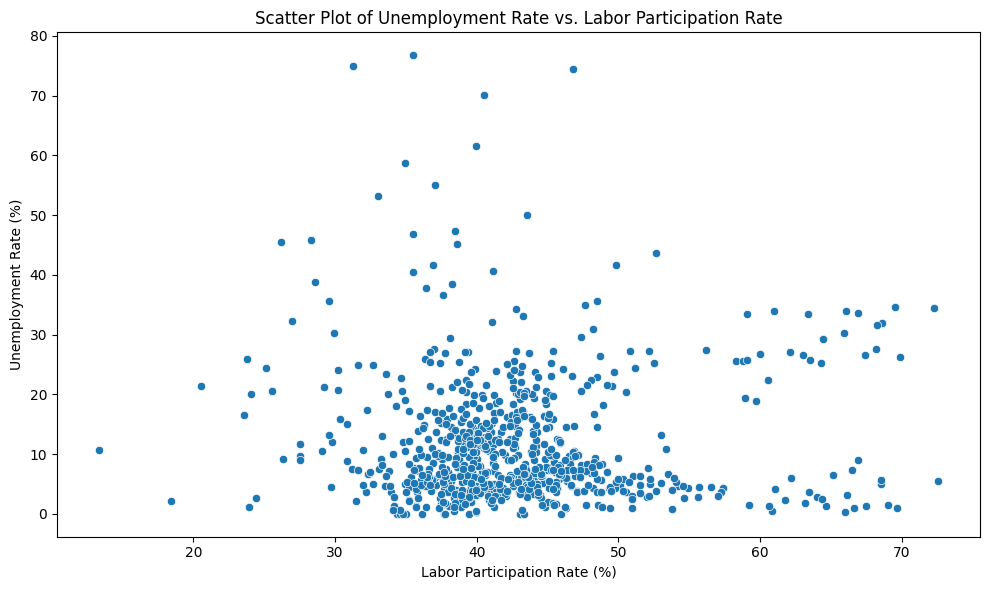

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)')
plt.title('Scatter Plot of Unemployment Rate vs. Labor Participation Rate')
plt.xlabel('Labor Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

CONCLUSION:
from above we can say that during COVID-19 India was heavily hit by unemployment especilly in the urban areas of the country most the people lost their jobs. BY region Tripura and Haryana were hit very strongly making the greatest umemployement rate in the country having highest unemployment rate in both urban as well as rural areas than any other states in India and significantly negative correlation between the Estimated unemployment over estimated employment.